## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

import os
import joblib

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

random_state = 4012

In [2]:
X_test = pd.read_csv('../Processed Data Files/X_test.csv')
y_test = pd.read_csv('../Processed Data Files/y_test.csv')

def evaluate(x_test, y_test, name, model, preprocessor):

    print(model,"\n")
    
    y_pred = model.predict(preprocessor.transform(x_test))

    scores = {}
    scores["Accuracy"]  = accuracy_score(y_test,y_pred).round(3)
    scores["Precision"] = precision_score(y_test,y_pred,average="weighted").round(3)
    scores["Recall"]    = recall_score(y_test,y_pred,average="weighted").round(3)
    scores["F1"]        = f1_score(y_test,y_pred,average="weighted").round(3)
    scores["ROC AUC"]   = roc_auc_score(y_test,y_pred,average="weighted").round(3)
    scores = {name:scores}
    print(pd.DataFrame(scores))

    cm = confusion_matrix(y_test,y_pred)
    cm_plot = sns.heatmap(cm, annot=True, fmt='g', cmap='Blues_r')
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values')

In [3]:
def evaluate_table(x_test, y_test, name, model, preprocessor):
    y_pred = model.predict(preprocessor.transform(x_test))

    scores = {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred).round(3),
        "Precision": precision_score(y_test, y_pred, average="weighted").round(3),
        "Recall": recall_score(y_test, y_pred, average="weighted").round(3),
        "F1": f1_score(y_test, y_pred, average="weighted").round(3),
        "ROC AUC": roc_auc_score(y_test, y_pred).round(3)
    }

    print(f"Scores for {name}:", scores)
    return scores


### Decision Tree

DecisionTreeClassifier(class_weight='balanced', max_depth=9,
                       max_features='sqrt', min_samples_leaf=5,
                       random_state=4012) 

           decision_tree
Accuracy           0.892
F1                 0.911
Precision          0.944
ROC AUC            0.822
Recall             0.892
Scores for decision_tree: {'Model': 'decision_tree', 'Accuracy': 0.892, 'Precision': 0.944, 'Recall': 0.892, 'F1': 0.911, 'ROC AUC': 0.822}


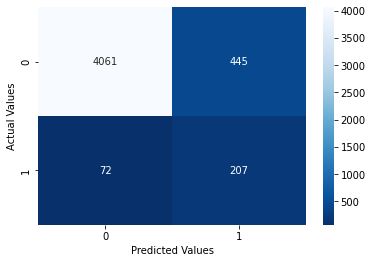

In [4]:
name = "decision_tree"
best_model = joblib.load(f"../Models/{name}.joblib")
evaluate(X_test,y_test,name,best_model['train'],best_model["preprocess"])

scores_df = evaluate_table(X_test, y_test, name, best_model['train'], best_model['preprocess'])
scores_dt = pd.DataFrame([scores_df])

### Random Forest

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=8, min_samples_leaf=5, random_state=4012) 

           random_forest
Accuracy           0.977
F1                 0.975
Precision          0.976
ROC AUC            0.835
Recall             0.977
Scores for random_forest: {'Model': 'random_forest', 'Accuracy': 0.977, 'Precision': 0.976, 'Recall': 0.977, 'F1': 0.975, 'ROC AUC': 0.835}


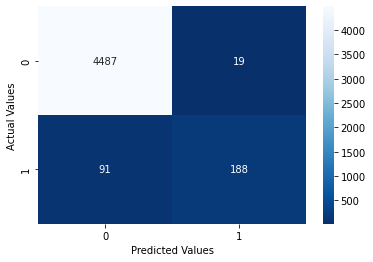

In [5]:
name = "random_forest"
best_model = joblib.load(f"../Models/{name}.joblib")
evaluate(X_test,y_test,name,best_model['train'],best_model["preprocess"])

scores_df = evaluate_table(X_test, y_test, name, best_model['train'], best_model['preprocess'])
scores_rf = pd.DataFrame([scores_df])

### AdaBoost

AdaBoostClassifier(learning_rate=1, n_estimators=300, random_state=4012) 

           adaboost
Accuracy      0.974
F1            0.973
Precision     0.973
ROC AUC       0.837
Recall        0.974
Scores for adaboost: {'Model': 'adaboost', 'Accuracy': 0.974, 'Precision': 0.973, 'Recall': 0.974, 'F1': 0.973, 'ROC AUC': 0.837}


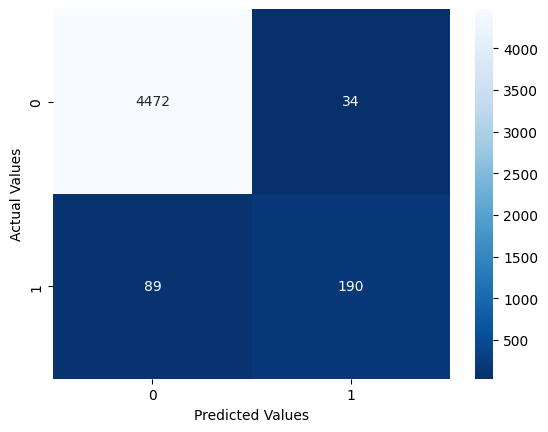

In [4]:
name = "adaboost"
best_model = joblib.load(f"../Models/{name}.joblib")
evaluate(X_test,y_test,name,best_model['train'],best_model["preprocess"])

scores_df = evaluate_table(X_test, y_test, name, best_model['train'], best_model['preprocess'])
scores_ada = pd.DataFrame([scores_df])

### XGBoost

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=4012, ...) 

           xgboost
Accuracy     0.982
F1           0.981
Precision    0.981
ROC AUC      0.866
Recall       0.982
Scores for xgboost: {'Model': 'xgboost', 'Accuracy': 0.982, 'Precision': 0.981, 'Recall': 0.982, 'F1': 0.981, 'ROC AUC': 0.866}


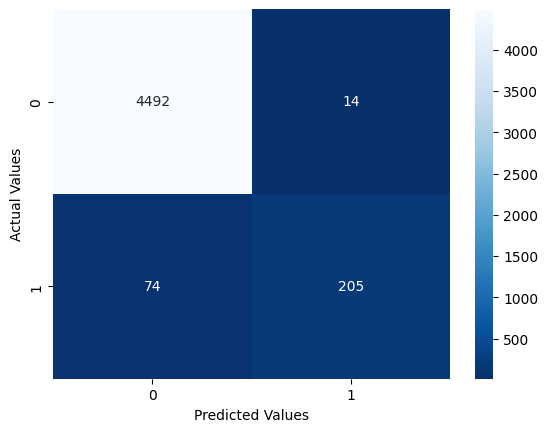

In [5]:
name = "xgboost"
best_model = joblib.load(f"../Models/{name}.joblib")
evaluate(X_test,y_test,name,best_model['train'],best_model["preprocess"])

scores_df = evaluate_table(X_test, y_test, name, best_model['train'], best_model['preprocess'])
scores_xg = pd.DataFrame([scores_df])

### CatBoost


           catboost
Accuracy      0.986
F1            0.985
Precision     0.985
ROC AUC       0.922
Recall        0.986
Scores for catboost: {'Model': 'catboost', 'Accuracy': 0.986, 'Precision': 0.985, 'Recall': 0.986, 'F1': 0.985, 'ROC AUC': 0.922}


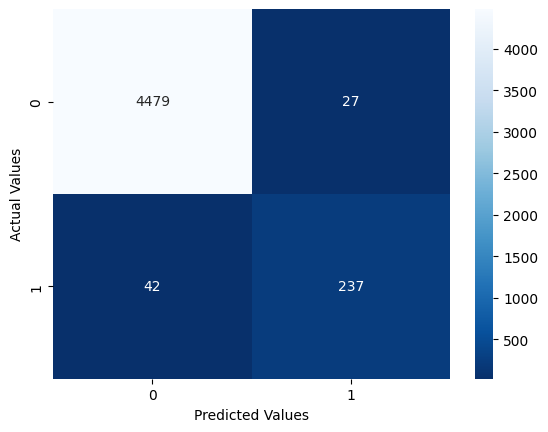

In [6]:
name = "catboost"
best_model = joblib.load(f"../Models/{name}.joblib")
evaluate(X_test,y_test,name,best_model['train'],best_model["preprocess"])

scores_df = evaluate_table(X_test, y_test, name, best_model['train'], best_model['preprocess'])
scores_cat = pd.DataFrame([scores_df])

### LogisticRegression

LogisticRegression(C=10) 

           LogisticRegression
Accuracy                0.949
F1                      0.934
Precision               0.939
ROC AUC                 0.594
Recall                  0.949
Scores for LogisticRegression: {'Model': 'LogisticRegression', 'Accuracy': 0.949, 'Precision': 0.939, 'Recall': 0.949, 'F1': 0.934, 'ROC AUC': 0.594}


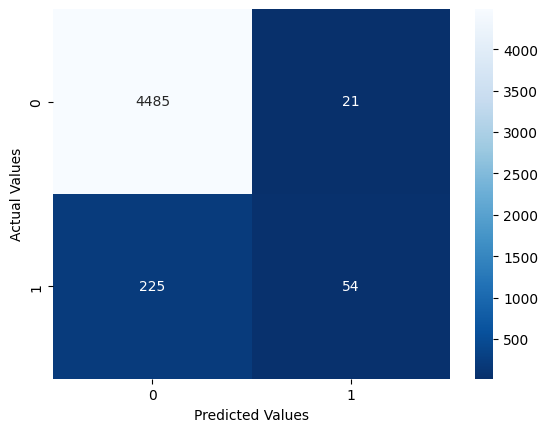

In [19]:
name = "LogisticRegression"
best_model = joblib.load(f"../Models/{name}.joblib")
evaluate(X_test,y_test,name,best_model['train'],best_model["preprocess"])

scores_df = evaluate_table(X_test, y_test, name, best_model['train'], best_model['preprocess'])
scores_lr = pd.DataFrame([scores_df])

### MLP

MLPClassifier(hidden_layer_sizes=(30, 30, 30), random_state=4012) 

             MLP
Accuracy   0.970
F1         0.966
Precision  0.970
ROC AUC    0.750
Recall     0.970
Scores for MLP: {'Model': 'MLP', 'Accuracy': 0.97, 'Precision': 0.97, 'Recall': 0.97, 'F1': 0.966, 'ROC AUC': 0.75}


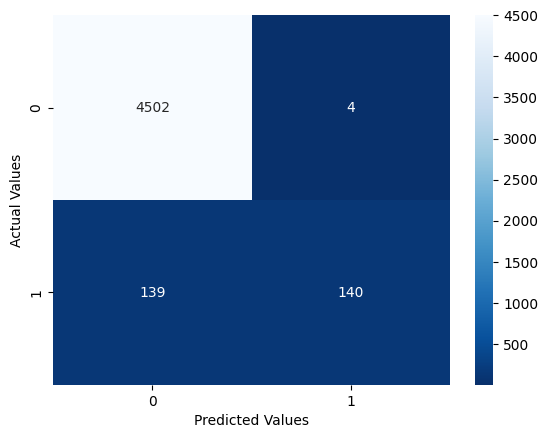

In [ ]:
name = "MLP"
best_model = joblib.load(f"../Models/{name}.joblib")
evaluate(X_test,y_test,name,best_model['train'],best_model["preprocess"])

scores_df = evaluate_table(X_test, y_test, name, best_model['train'], best_model['preprocess'])
scores_mlp = pd.DataFrame([scores_df])

### Naive Bayes

GaussianNB() 

           NaiveBayes
Accuracy        0.882
F1              0.904
Precision       0.942
ROC AUC         0.811
Recall          0.882
Scores for NaiveBayes: {'Model': 'NaiveBayes', 'Accuracy': 0.882, 'Precision': 0.942, 'Recall': 0.882, 'F1': 0.904, 'ROC AUC': 0.811}


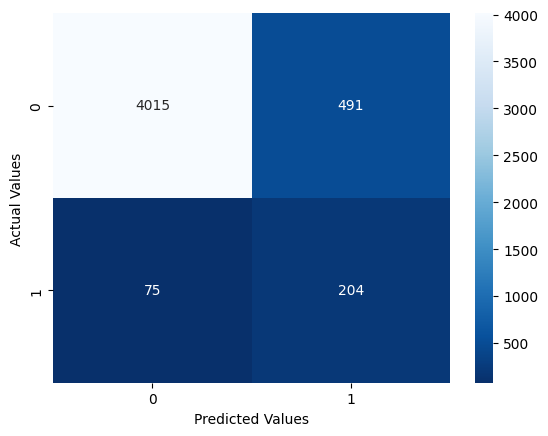

In [ ]:
name = "NaiveBayes"
best_model = joblib.load(f"../Models/{name}.joblib")
evaluate(X_test,y_test,name,best_model['train'],best_model["preprocess"])

scores_df = evaluate_table(X_test, y_test, name, best_model['train'], best_model['preprocess'])
scores_nb = pd.DataFrame([scores_df])

### SVM

SVC(C=0.1) 

             SVM
Accuracy   0.942
F1         0.913
Precision  0.887
ROC AUC    0.500
Recall     0.942
Scores for SVM: {'Model': 'SVM', 'Accuracy': 0.942, 'Precision': 0.887, 'Recall': 0.942, 'F1': 0.913, 'ROC AUC': 0.5}


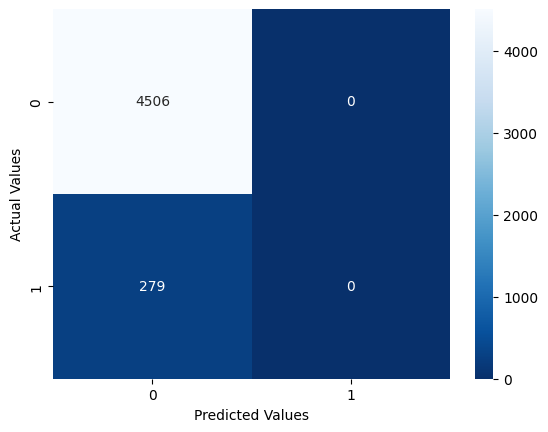

In [ ]:
name = "SVM"
best_model = joblib.load(f"../Models/{name}.joblib")
evaluate(X_test,y_test,name,best_model['train'],best_model["preprocess"])

scores_df = evaluate_table(X_test, y_test, name, best_model['train'], best_model['preprocess'])
scores_svm = pd.DataFrame([scores_df])

#### Concatenate all the tables and sort by Accuracy score

In [6]:
# all_scores_df = pd.concat([scores_svm, scores_ada, scores_cat, scores_dt, scores_lr, scores_mlp, scores_nb, scores_xg], ignore_index=True)
# sorted_scores_df = all_scores_df.sort_values(by='Accuracy', ascending=False)
# print(sorted_scores_df)